# Алгоритмы машинного обучения на датасете Breast cancer

In [3]:
from sklearn.datasets import load_breast_cancer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import export_graphviz
import matplotlib.pylab as plt

import numpy as np
import graphviz
%matplotlib inline

In [4]:
cancer = load_breast_cancer()

In [5]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
print(cancer.target_names)

['malignant' 'benign']


In [7]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
type(cancer.data)

numpy.ndarray

In [9]:
cancer.data.shape

(569, 30)

# Метод k ближайших соседей

In [12]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state =66)

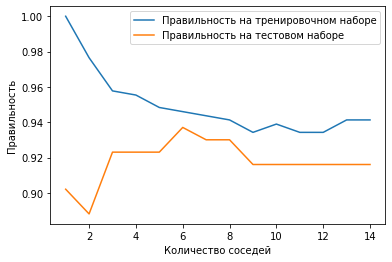

In [13]:
training_accuracy = []
test_accuracy = []

# попробуем запустить Метод ближайших соседей при различных значениях параметра k - кол-во ближайших соседей от 1 до 14
neighbors_setting = range(1,15) 

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))
    
plt.plot(neighbors_setting,training_accuracy, label = 'Правильность на тренировочном наборе')
plt.plot(neighbors_setting,test_accuracy, label = 'Правильность на тестовом наборе')
plt.ylabel('Правильность')
plt.xlabel('Количество соседей')
plt.legend()


In [17]:
# при k = 6 видно, что модель достигает наибольшей точности 

print ('Правильность на тренировочном наборе, при k = 6: {:.3f}'.format(training_accuracy[5]))
print ('Правильность на тестовом наборе, при k = 6: {:.3f}'.format(test_accuracy[5]))

Правильность на тренировочном наборе, при k = 6: 0.946
Правильность на тестовом наборе, при k = 6: 0.937


# Логистическая регрессия

In [20]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = 42)


log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

    
print ('Правильность на тренировочном наборе: {:.3f}'.format(log_reg.score(X_train,y_train)))
print ('Правильность на тестовом наборе: {:.3f}'.format(log_reg.score(X_test,y_test)))

Правильность на тренировочном наборе: 0.953
Правильность на тестовом наборе: 0.958


# Дерево решений

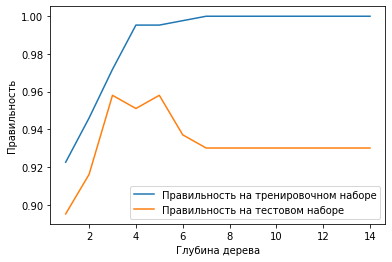

In [57]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 42)

training_accuracy = []
test_accuracy = []

# у деревьев мы можем регулировать их глубину. 
# Рассмотрим точность деревьев при глубине от 1 до 14
max_depth = range(1,15) 

for md in max_depth:
    tree = DecisionTreeClassifier(max_depth = md, random_state=0)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train,y_train))
    test_accuracy.append(tree.score(X_test,y_test))
    
    
plt.plot(max_depth,training_accuracy, label = 'Правильность на тренировочном наборе')
plt.plot(max_depth,test_accuracy, label = 'Правильность на тестовом наборе')
plt.ylabel('Правильность')
plt.xlabel('Глубина дерева')
plt.legend()

При глубине дерева более 5 модель переобучается: на тренировочном наборе алгоритм предсказывает значения с высокой правильностью, 
но при этом правильность на тестовом наборе данных снижается.

На графике видно, что лучшая правильность на обоих наборах достигается при max_depth = 3.

In [58]:
export_graphviz(tree, out_file='cancerTree.dot', class_names=['malignant','benign'], 
                feature_names=cancer.feature_names, 
                impurity=False, filled=True)

In [59]:
print('Feature importances:\n {}'.format(tree.feature_importances_))
type(tree.feature_importances_)

Feature importances:
 [0.         0.         0.         0.         0.         0.
 0.         0.72468105 0.         0.         0.01277192 0.
 0.         0.         0.00826156 0.         0.         0.01702539
 0.         0.         0.05899273 0.12550655 0.00838371 0.03452044
 0.00985664 0.         0.         0.         0.         0.        ]


numpy.ndarray

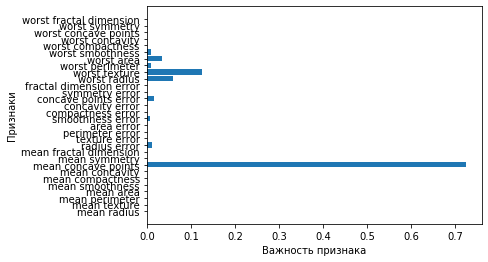

In [66]:
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature),tree.feature_importances_, align = 'center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.show()

# Случайный лес

In [67]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

forest = RandomForestClassifier(n_estimators = 100,random_state = 0)
forest.fit(X_train,y_train)

print ('Правильность на тренировочном наборе: {:.3f}'.format(forest.score(X_train,y_train)))
print ('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test,y_test)))

# можно регулировать параметры max_depth и max_features

Правильность на тренировочном наборе: 1.000
Правильность на тестовом наборе: 0.972


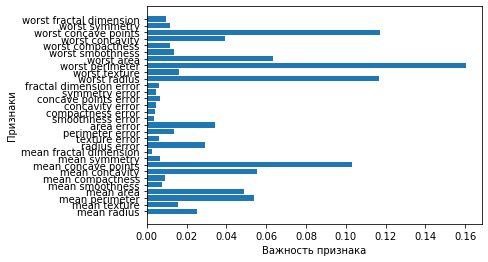

In [68]:
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature),forest.feature_importances_, align = 'center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.show()

Без настройки каких-либо параметров случайный лес дает нам правильность 97%, это лучше результата линейных моделей или
одиночного дерева решений. Можно было бы отрегулировать настройку max_features или max_depth, как это делалось
для одиночного дерева решений. Однако, здесь это не требуется, тк алгоритм показывает хорошие результаты при стандартной настройке.

# Нейронная сеть

In [70]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

mlp = MLPClassifier(random_state = 42)
mlp.fit(X_train,y_train)

print ('Правильность на тренировочном наборе: {:.3f}'.format(mlp.score(X_train,y_train)))
print ('Правильность на тестовом наборе: {:.3f}'.format(mlp.score(X_test,y_test)))

Правильность на тренировочном наборе: 0.906
Правильность на тестовом наборе: 0.881


Нейронные сети также требуют того, чтобы все входные признаки были измерены в одном и том же масштабе, в идеале они должны иметь среднее 0 и дисперсию 1. 

In [72]:
print('Максимум для каждого признака:\n {}'.format(cancer.data.max(axis = 0)))

Максимум для каждого признака:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [77]:
# попробуем отмасштабировать данные и сравнить результаты
scaler = StandardScaler()

X_train_scaled = scaler.fit(X_train).transform(X_train) # в исходном ноутбуке ошибка, Мюллер стр 153
X_test_scaled = scaler.fit(X_train).transform(X_test)

mlp = MLPClassifier(max_iter = 1000,random_state = 42)
mlp.fit(X_train_scaled,y_train)

print ('Правильность на тренировочном наборе: {:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print ('Правильность на тестовом наборе: {:.3f}'.format(mlp.score(X_test_scaled,y_test)))

# масштабирование данных помогло, результаты стали лучше

Правильность на тренировочном наборе: 0.995
Правильность на тестовом наборе: 0.958


In [78]:
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [79]:
# alpha=0.0001, низкое значение alpha => небольшая регуляризация
# попробуем поменять этот параметр и установить более сильную регуляризацию коэффициентов

mlp = MLPClassifier(max_iter = 1000, alpha = 1, random_state = 42)
mlp.fit(X_train_scaled,y_train)

print ('Правильность на тренировочном наборе: {:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print ('Правильность на тестовом наборе: {:.3f}'.format(mlp.score(X_test_scaled,y_test)))

Правильность на тренировочном наборе: 0.988
Правильность на тестовом наборе: 0.979


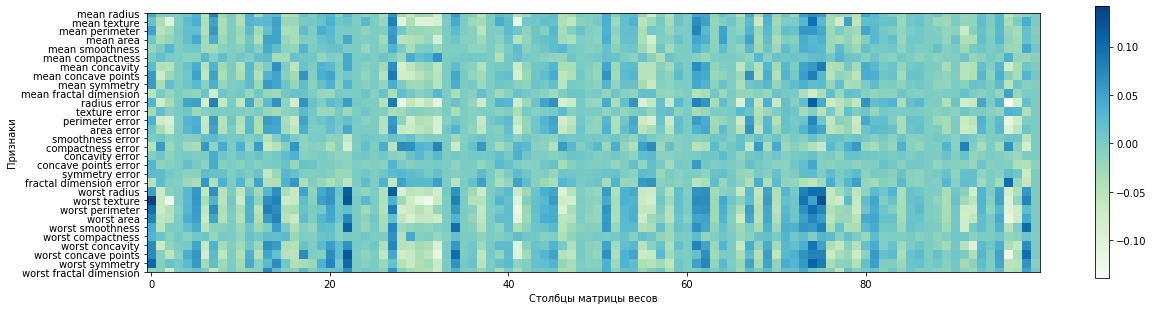

In [80]:

plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='None',cmap='GnBu')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('Столбцы матрицы весов')
plt.ylabel('Признаки')
plt.colorbar()

Из графика можно сделать вывод, что признаки с небольшими весами «менее важны» в модели. «mean
smoothness» и «mean compactness» наряду с признаками,
расположенными между «smothness error» и «fractal dimension error»,
имеют относительно низкие веса по сравнению с другими признаками.
Это может означать, что эти признаки являются менее важными или,
возможно, мы не преобразовали их таким способом, чтобы их могла
использовать нейронная сеть.


# Метод опорных векторов

In [81]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

svm = SVC()
svm.fit(X_train,y_train)

print ('Правильность на тренировочном наборе: {:.3f}'.format(svm.score(X_train,y_train)))
print ('Правильность на тестовом наборе: {:.3f}'.format(svm.score(X_test,y_test)))

Правильность на тренировочном наборе: 1.000
Правильность на тестовом наборе: 0.629


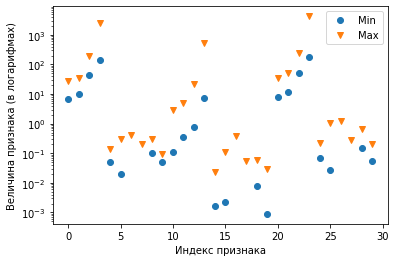

In [84]:
# сталкнулись с переобучением
# следует настроить гиперпараметры
# Метод опорных векторов как и Нейронные сети очень чувствителен к масштабированию данных


plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Индекс признака')
plt.ylabel('Величина признака (в логарифмах)')
plt.yscale('log')
plt.legend(loc ='upper right')

In [85]:
# попробуем отмасштабировать данные и сравнить результаты
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train
X_test_scaled = (X_test - min_train)/range_train

print('Минимальные значения признаков \n{}'.format(X_train_scaled.min(axis=0)))
print('Максимальные значения признаков\n{}'.format(X_train_scaled.max(axis=0)))

Минимальные значения признаков 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Максимальные значения признаков
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [89]:
svm = SVC()
svm.fit(X_train_scaled,y_train)

print ('Правильность на тренировочном наборе: {:.3f}'.format(svm.score(X_train_scaled,y_train)))
print ('Правильность на тестовом наборе: {:.3f}'.format(svm.score(X_test_scaled,y_test)))

# тк алгоритм дает на тестовом наборе результат лучше, чем на тренировочном, то скорее всего модель недообучена
# модель имеет признаки недообучения, когда качество модели на обучающем и тестовом наборе весьма схоже, но все еще далеко от 
# 100%-ной правильности

Правильность на тренировочном наборе: 0.948
Правильность на тестовом наборе: 0.951


In [90]:
svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [92]:
# попробуем настроить параметр С, отвечающий за регуляризацию
# небольшое значение C соответствует модели с весьма жесткими ограничениями
svm = SVC(C = 1000)
svm.fit(X_train_scaled,y_train)

print ('Правильность на тренировочном наборе: {:.3f}'.format(svm.score(X_train_scaled,y_train)))
print ('Правильность на тестовом наборе: {:.3f}'.format(svm.score(X_test_scaled,y_test)))


Правильность на тренировочном наборе: 0.988
Правильность на тестовом наборе: 0.972
